<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/L20251105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 0 1]


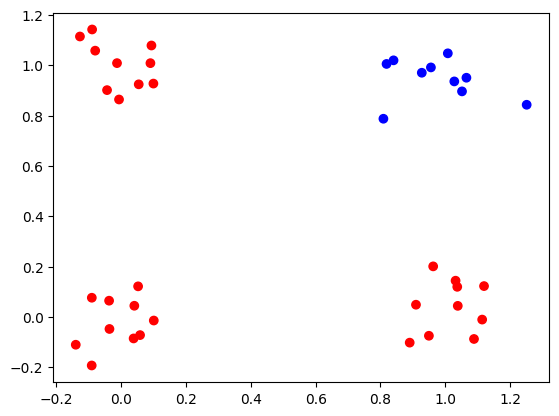

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def onehot(x):

  k=np.max(x)+1
  y = np.identity(k)

  return y[x]

def softmax(x):

  c = np.max(x,axis=-1,keepdims=True)
  e = np.exp(x-c)
  z = np.sum(e,axis=-1,keepdims=True)

  return e/z


class Sigmoid:

  def __init__(self):

    self.out = None

  def __call__(self,x):

    y = 1/(1+np.exp(-x))
    self.out = y

    return y

  def backward(self,dout):

    return dout*self.out * (1-self.out)

class Linear:

  def __init__(self,d_in,d_out):

    self.W = np.random.randn(d_in,d_out)
    self.b = np.zeros(d_out)

    self.dW = np.zeros_like(self.W)
    self.db = np.zeros_like(self.b)

    self.inputs = None

  def __call__(self,x):

    self.inputs = x

    y = x @ self.W + self.b

    return y


  def backward(self,dout):

    self.dW = self.inputs.T @ dout
    self.db = np.sum(dout)

    return dout @ self.W.T

  def optimizer(self,lr=0.1):

    self.W -= lr * self.dW
    self.b -= lr * self.db


class MLP:

  def __init__(self,d_in,d_h,d_out):

    self.l1 = Linear(d_in,d_h)
    self.a = Sigmoid()
    self.l2 = Linear(d_h,d_out)

  def __call__(self,x):

    x = self.l1(x)
    x = self.a(x)
    x = self.l2(x)

    return x

  def backward(self,dout):

    dout = self.l2.backward(dout)
    dout = self.a.backward(dout)
    dout = self.l1.backward(dout)

  def optimizer(self,lr=0.1):

    self.l1.optimizer(lr=0.1)
    self.l2.optimizer(lr=0.1)

  def fit(self,x,t,epochs=200,lr=0.1):

    l = []

    for i in range(epochs):

      n = x.shape[0]
      y = self(x)
      y = softmax(y)
      dout = (y-t)/n
      self.backward(dout)
      self.optimizer(lr=0.1)
      l.append(loss(y,t))

    return l


  def pred(self,x):

    out = self(x)

    return np.argmax(out,axis=-1)

def loss(y,t):
  eps = 1e-6

  loss = -np.sum(t*np.log(y+eps))

  return loss

def dataset(x,y,size=10,scale=0.1):

  X,Y = [],[]
  n = x.shape[1]
  for x0,y0 in zip(x,y):
    X.extend(x0+np.random.randn(size,n)*scale)
    Y.extend(np.full(size,y0))

  X = np.vstack(X)
  Y = np.hstack(Y)

  return X,onehot(Y)

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

x_noise,y_noise = dataset(x,y,size=10,scale=0.1)

y = onehot(y)

d_in = x.shape[1]
d_h = 4*d_in
d_out = y.shape[1]

model = MLP(d_in,d_h,d_out)
out = model(x)
loss = model.fit(x,y,epochs=500,lr=0.1)
pred = model.pred(x)
print(pred)


color=['red','blue','green','orange']
c = [color[i] for i in np.argmax(y_noise,axis=1)]
plt.scatter(x_noise[:,0],x_noise[:,1],c=c)
plt.show()



In [94]:
a = [1,2,3]
b = [4,5]

a.extend(b)

print(a)

[1, 2, 3, 4, 5]
